#Tomografía

Ezequiel Vijande

Lucero Guadalupe Fernandez

### Librerías

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import radon, iradon
from scipy.ndimage import zoom
from matplotlib.patches import Ellipse
import numpy as np
import cv2 as cv

##Variables a configurar por el usuario

###1. Creación y modificación de un phantom

*   Intensidad: Varía entre -1 y 1, ya que es aditiva. (I)
*   Inclinación: Ángulo en grados de rotación respecto al eje x. (A)
*   Semi-eje X: Valor del semi-eje X de la elipse, entre (0 ; 1]. (X)
*   Semi-eje Y: Valor del semi-eje Y de la elipse, entre (0 ; 1]. (Y)
*   Centro X: Coordenada X del centro de la elipse, entre [-1 ; 1]. (CX)
*   Centro Y: Coordenada Y del centro de la elipse, entre [-1 ; 1]. (CY)

###2. Procesamiento del phantom mediante transformada de Radon

*   Ángulo en grados de comienzo.
*   Ángulo en grados de finalización
*   Paso entre ambos ángulos

###3. Reconstrucción a partir de la transformada inversa de Radon

*   Tipo de filtro: 'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann'.
*   Método de interpolación:'linear', 'nearest', and 'cubic'.

In [2]:
ellipses = []
#1. Creación y modificación de un phantom
#copiar esta linea cuantas veces como elipses se deseen para el phantom
#[intensidad, inclinacion, semi-eje x, semi-eje y, cnetro x, centro y]
ellipses.append([0.99, 0.0, 0.3, 0.7, 0.2, 0.4])
ellipses.append([0.3, 45.0, .8, -0.4, -0.5, -0.5])

#2. Procesamiento del phantom mediante transformada de Radon
start_phi = 0
stop_phi = 180
step=1

#3. Reconstrucción a partir de la transformada inversa de Radon
#filter: 'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann'
filter = 'ramp'
#interpolation: 'linear', 'nearest', and 'cubic'
interpolation = 'nearest'

##Phantom

In [3]:
def Phantom(ellipses, fig):
  ax = fig.add_subplot(111, aspect='equal')
  for e in ellipses:
    el = Ellipse(xy=(e[4], e[5]), width=e[2], height=e[3], angle=e[1])
    el.set_alpha(e[0])
    ax.add_artist(el)
    el.set_clip_box(ax.bbox)

  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)

  fig.canvas.draw()
  plt.axis('off')
  img = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8, sep='')
  plt.savefig("phantom.png", bbox_inches='tight', transparent=True)

  return img

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


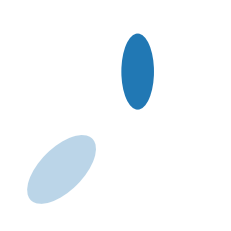

In [4]:
fig = plt.figure(1)
phantom = Phantom(ellipses, fig)

## Transformada de Radon

In [5]:
def GetRadonTransforms(img,start_phi, stop_phi, step):
  angle_arr = np.arange(start=start_phi,stop=stop_phi+0.1,step=step)
  projections = radon(img, theta=angle_arr)
  return projections

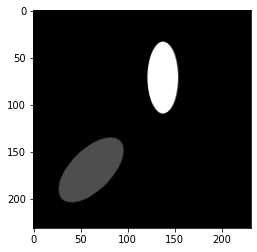

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


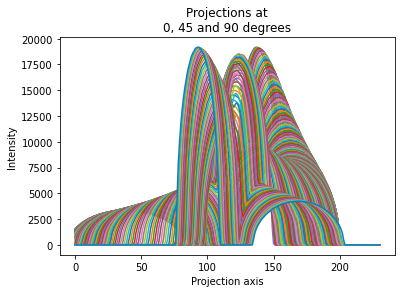

In [6]:
img = cv.imread("phantom.png", cv.IMREAD_UNCHANGED)
img = 255 - img[:, :, 3]
img = cv.bitwise_not(img)

plt.imshow(img,cmap="gray")
plt.show()

projections = GetRadonTransforms(img,start_phi, stop_phi, step)
plt.plot(projections)
plt.title("Projections at\n0, 45 and 90 degrees")
plt.xlabel("Projection axis")
plt.ylabel("Intensity")
plt.show()

# Reoonstrucción a partir de proyecciones

In [7]:
def Reconstruction(projections,angles,size=None,filter_="ramp", interpolation_="linear"):
  return iradon(projections, theta=angles, output_size=size, filter=filter_, interpolation=interpolation_)

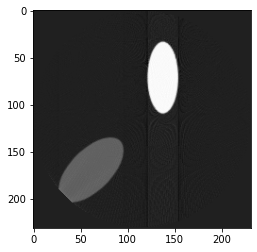

In [8]:
reconstruction = Reconstruction(projections,np.arange(start=start_phi,stop=stop_phi+0.1,step=step), filter_=filter, interpolation_=interpolation)
plt.imshow(reconstruction,cmap="gray")